Quiz 16 - Computing Rescaled Features

In [20]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

numpy.set_printoptions(suppress=True)

#print "max and min of salary", data[data[:,1].argsort()]
#print "max and min of exercised_stock_options", data[data[:,2].argsort()]


import sklearn.preprocessing as pre

scaler = pre.MinMaxScaler()

scaler.fit(data[:, 1])

print scaler.transform([200000.])

scaler.fit(data[:, 2])

print scaler.transform([1000000.])






[ 0.17997621]
[ 0.02911345]


/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will r

[[       0.   365788.       29.]
 [       0.   267102.        0.]
 [       0.   170941.        0.]
 [       0.        0.       12.]
 [       1.   243293.       32.]
 [       0.   267093.        0.]
 [       0.        0.       28.]
 [       0.   370448.       48.]
 [       0.        0.     1073.]
 [       0.   197091.      222.]
 [       0.   130724.       17.]
 [       0.   288589.       18.]
 [       0.   248546.       14.]
 [       0.   257486.       38.]
 [       0.        0.       12.]
 [       1.   288542.       40.]
 [       0.   251654.       16.]
 [       0.   288558.       56.]
 [       0.    63744.        0.]
 [       0.   357091.      146.]
 [       0.   271442.     1728.]
 [       0.   304110.     2681.]
 [       0.   187922.       59.]
 [       0.   213625.       40.]
 [       1.   249201.       82.]
 [       0.   231330.     4343.]
 [       0.        0.       19.]
 [       0.   182245.        0.]
 [       0.   211788.       27.]
 [       0.        0.       26.]
 [       0

/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will r

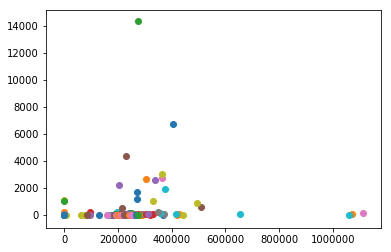

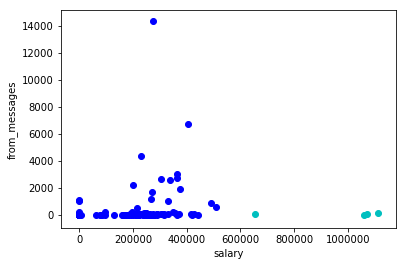

In [21]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "from_messages"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )



numpy.set_printoptions(suppress=True)

#print "max and min of salary", data[data[:,1].argsort()]
#print "max and min of exercised_stock_options", data[data[:,2].argsort()]

print data

import sklearn.preprocessing as pre

scaler = pre.MinMaxScaler()

scaler.fit(data[:, 1])

print scaler.transform([200000.])

scaler.fit(data[:, 2])

print scaler.transform([1000000.])


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()


from sklearn.cluster import KMeans

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred = kmeans.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"